# Intro to FB Prophet and teaching own ML model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet


In [2]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv'

df = pd.read_csv(path)
df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


In [3]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [4]:
df['ppm_fixed'] = df['ppm'].map(lambda x:np.nan if x<0 else x)
df['ppm_fixed'].fillna(method='backfill', inplace=True)

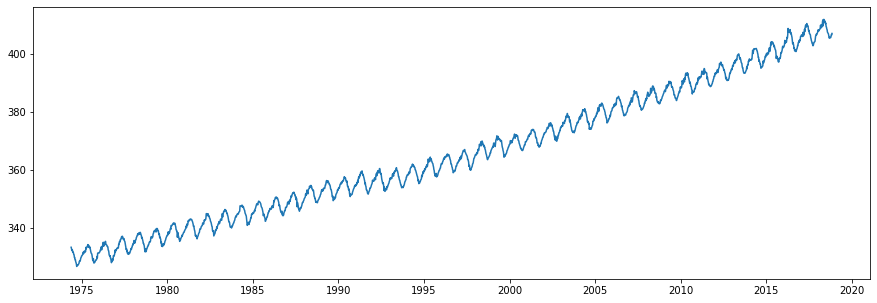

In [5]:
plt.figure(figsize=(15,5))
plt.plot(df.date, df.ppm_fixed);

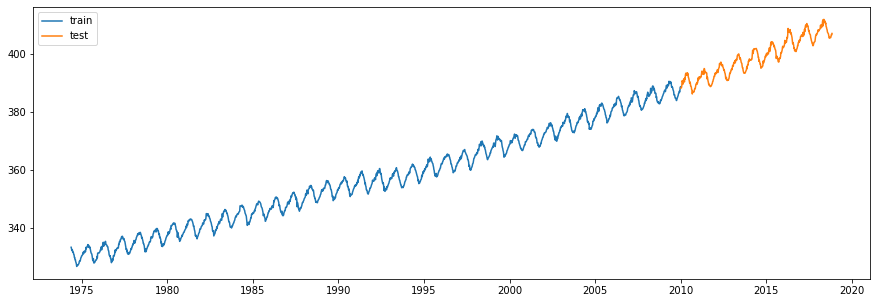

In [6]:
train = df[ df.year<2010 ]
test = df[ df.year >= 2010 ]
plt.figure(figsize=(15,5))
plt.plot(train.date, train.ppm_fixed, label='train');
plt.plot(test.date, test.ppm_fixed, label='test');
plt.legend()

# Prophet

In [9]:
fb_df = train[ ['date', 'ppm_fixed' ] ].copy()
fb_df.columns = ['ds', 'y']

fb_df.head()

,ds,y
0,1974-05-19,333.34
1,1974-05-26,332.95
2,1974-06-02,332.32
3,1974-06-09,332.18
4,1974-06-16,332.37


In [10]:
m = Prophet()
m.fit(fb_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = m.make_future_dataframe(periods=len(test), freq='W', include_history=False)
future.tail()

,ds
457,2018-10-07
458,2018-10-14
459,2018-10-21
460,2018-10-28
461,2018-11-04


In [14]:
test.tail()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800,date,ppm_fixed
2316,2018,10,7,2018.7658,405.58,7,403.38,382.78,129.25,2018-10-07,405.58
2317,2018,10,14,2018.7849,406.00,6,403.81,382.92,129.45,2018-10-14,406.00
2318,2018,10,21,2018.8041,406.62,7,404.04,383.04,129.77,2018-10-21,406.62
2319,2018,10,28,2018.8233,406.48,6,404.07,383.96,129.29,2018-10-28,406.48
2320,2018,11,4,2018.8425,406.99,5,404.26,383.80,129.43,2018-11-04,406.99


In [15]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-03,388.641156,387.963528,389.010664,388.641156,388.641156,-0.172904,-0.172904,-0.172904,-0.172904,-0.172904,-0.172904,0.0,0.0,0.0,388.468252
1,2010-01-10,388.679144,388.187826,389.247625,388.679144,388.679144,0.020884,0.020884,0.020884,0.020884,0.020884,0.020884,0.0,0.0,0.0,388.700029
2,2010-01-17,388.717133,388.351910,389.473888,388.717133,388.717133,0.204730,0.204730,0.204730,0.204730,0.204730,0.204730,0.0,0.0,0.0,388.921863
3,2010-01-24,388.755121,388.581528,389.640656,388.755121,388.755121,0.366814,0.366814,0.366814,0.366814,0.366814,0.366814,0.0,0.0,0.0,389.121935
4,2010-01-31,388.793109,388.755981,389.810400,388.793109,388.793109,0.503869,0.503869,0.503869,0.503869,0.503869,0.503869,0.0,0.0,0.0,389.296978


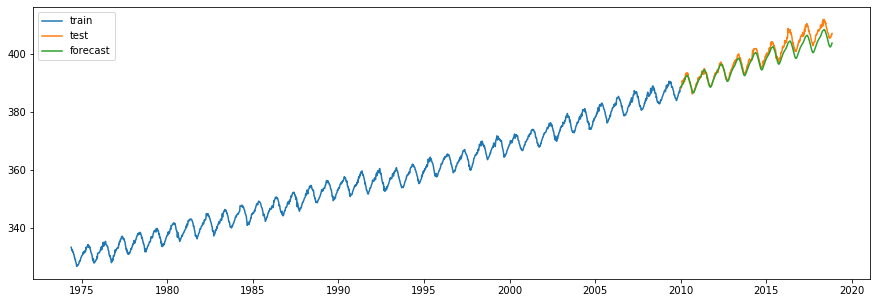

In [16]:
plt.figure(figsize=(15,5))
plt.plot(train.date, train.ppm_fixed, label='train');
plt.plot(test.date, test.ppm_fixed, label='test');
plt.plot(forecast.ds, forecast.yhat, label='forecast');
plt.legend()

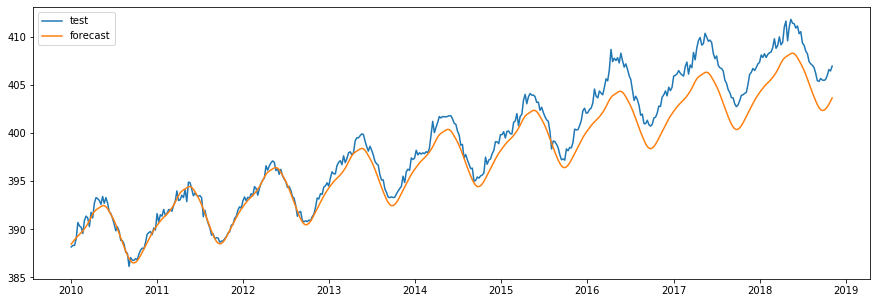

In [17]:
plt.figure(figsize=(15,5))
plt.plot(test.date, test.ppm_fixed, label='test');
plt.plot(forecast.ds, forecast.yhat, label='forecast');
plt.legend()

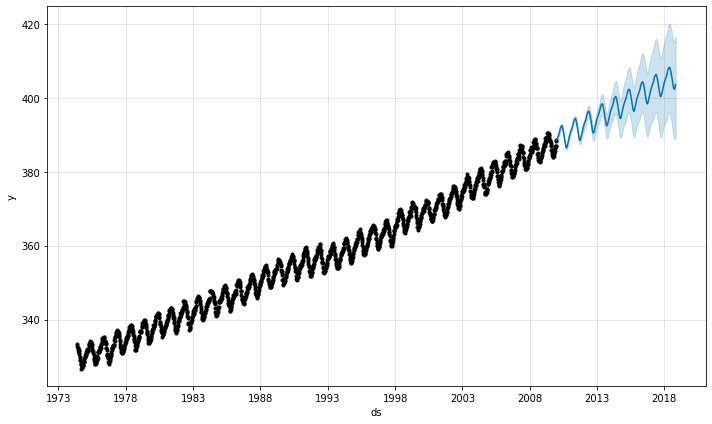

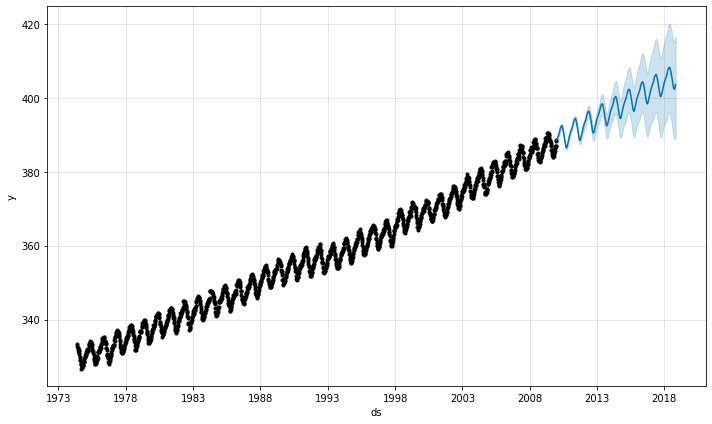

In [18]:
m.plot(forecast)